## Differential Evolution

In [10]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

## Initialize Differential Evolution

In [16]:
from pyIpnHeuristic.differentialEvolution import DifferentialEvolution

differentialEvolution = DifferentialEvolution(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=4,
    smooth=False,
    epsilon=10**-4,
    f=0.9,
    cr=0.8,
)

differentialEvolution.search(iterations=100000, save_history=True)

## Results

In [17]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in differentialEvolution.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration,||xi-X||,fxi - Fx
0,"[14.094999999999988, 0.8429607892154539]",-6961.813876,0.000000,0,100000,2.850161e-14,-2.819434e-11
1,"[14.094999999999988, 0.8429607892154539]",-6961.813876,0.000000,0,99999,2.850161e-14,-2.819434e-11
2,"[14.094999999999988, 0.8429607892154539]",-6961.813876,0.000000,0,99998,2.850161e-14,-2.819434e-11
3,"[14.094999999999988, 0.8429607892154539]",-6961.813876,0.000000,0,99997,2.850161e-14,-2.819434e-11
4,"[14.094999999999988, 0.8429607892154539]",-6961.813876,0.000000,0,99996,2.850161e-14,-2.819434e-11
...,...,...,...,...,...,...,...
99995,"[15.766955467937883, 23.568703678686408]",237.245856,357.380175,0,5,2.278716e+01,7.199060e+03
99996,"[15.766955467937883, 23.568703678686408]",237.245856,357.380175,0,4,2.278716e+01,7.199060e+03
99997,"[15.766955467937883, 23.568703678686408]",237.245856,357.380175,0,3,2.278716e+01,7.199060e+03
99998,"[26.287387279122168, 36.981957966730036]",9218.075708,1351.613718,0,2,3.814029e+01,1.617989e+04


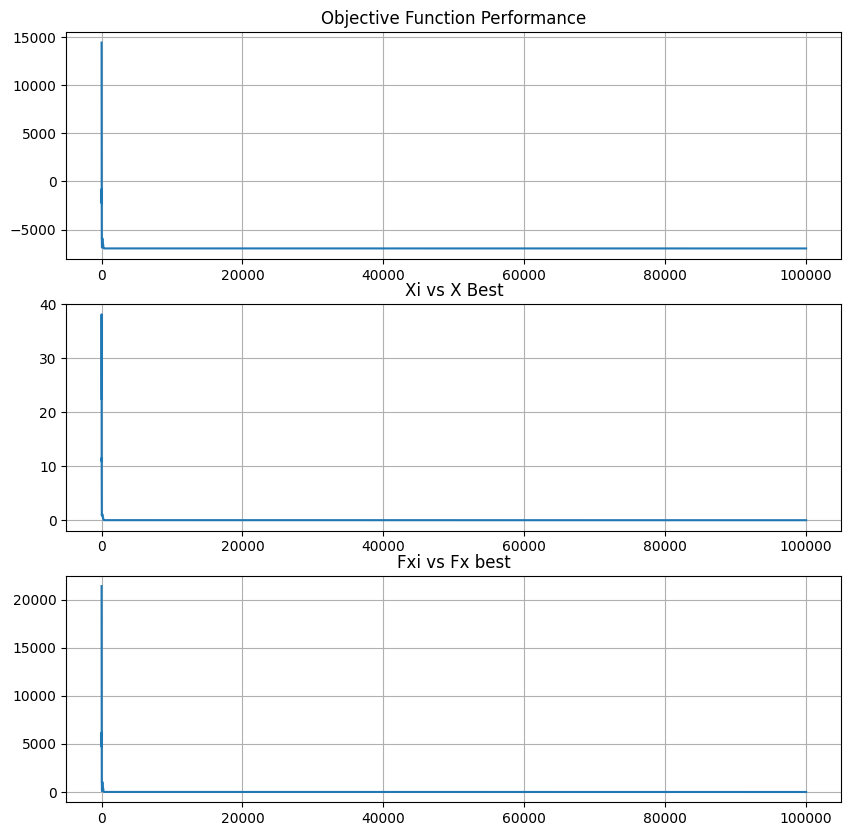

In [18]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in differentialEvolution.history]
display_performance_results(rich_history)